## Imports des librairies et autres réjouissances

In [ ]:
# Pour que les changements dans les modules importés soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [ ]:
# librairies
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Changement des paramètres d'affichage par défaut
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = 20, 10
#mpl.rcParams['lines.linewidth'] = 4
#mpl.rcParams['font.size'] = 24
#mpl.rcParams['lines.markersize'] = 15
#mpl.rcParams.find_all('')

In [4]:
# permet d'obtenir le temps d'exécution de chacune des cellules du notebook
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=d4357fe26b2c487ff3dc2912839f7285614ac454210990986aac6d299b593683
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [5]:
from google.colab import drive
drive.mount('drive')
os.chdir('drive/My Drive/univ/master-2/reinforcement-learning')
from bandits_contextuels import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive
time: 22.1 s


## On définit une fonction pour simuler le fonctionnement de l'algorithme

In [30]:
def run_algo(n_iterations, bandit, algorithm):
    rewards = np.empty(n_iterations)
    max_rewards = np.empty(n_iterations)

    for iteration in range(n_iterations):
        # ---
        # (1) Observation d'un contexte
        # (2) Choix du bras par l'algo en fct du contexte
        # (3) Récompense obtenue en fct du bras choisi et du contexte
        # (4) Mise à jour en fct du contexte, du bras et de la récompense
        # ---
        context = bandit.get_context()
        idx_arm = algorithm.get_action(context)
        reward = bandit.step(idx_arm, context)
        algorithm.fit_step(action=idx_arm, reward=reward, x=context)

        # mise à jour des compteurs
        # la récompense maximale suit un modèle linéaire
        rewards[iteration] = reward
        max_rewards[iteration] = np.max(context.T @ bandit._theta)

    # récompenses maximale et réelle cumulées 
    cum_reward = np.cumsum(rewards)
    cum_max_reward = np.cumsum(max_rewards)

    # le regret correspond à la différence entre la décision prise pour
    # un contexte donné et la meilleure décision possible pour ce contexte
    regret = cum_max_reward - cum_reward

    return regret

def run_algo_n(n_simulations, n_iterations, bandit, algorithm):
    regret = 0
    for _ in range(n_simulations):
        regret += (run_algo(n_iterations, bandit, algorithm) / n_simulations)
    
    return regret

time: 16.5 ms


## On définit une fonction pour afficher les performances des stratégies

In [31]:
def display_regret(regrets):
    plt.xlabel('Iterations')
    plt.ylabel('Regret')
    plt.semilogx(regrets)
    plt.grid()
    plt.show()

time: 2.06 ms


## Variables globales

In [37]:
N_ARMS = 30
N_FEATURES = 10
DELTA = 0.5
N_ITERATIONS = 1000

BANDIT = LinearBandits(N_ARMS, N_FEATURES)

time: 2.73 ms


## Simulation LinUCB sans optimisation

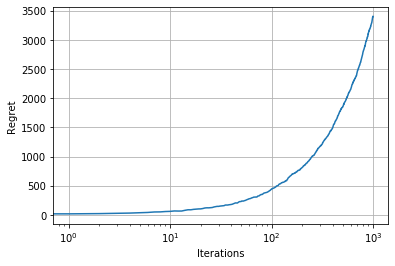

time: 2.48 s


In [38]:
algo_base = LinUCBAlgorithm(N_ARMS, N_FEATURES, DELTA)
regret_base = run_algo_n(1, N_ITERATIONS, BANDIT, algo_base)
display_regret(regret_base)

## Simulation LinUCB avec optimisation

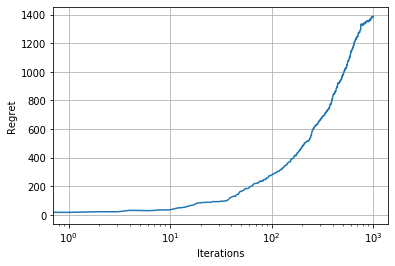

time: 921 ms


In [43]:
algo_optim = LinUCBAlgorithmOptimized(N_ARMS, N_FEATURES, DELTA)
regret_optim = run_algo_n(1, N_ITERATIONS, BANDIT, algo_optim)
display_regret(regret_optim)